# TRABAJO FINAL - DATA MINING & DATA ANALYSIS


## Integrantes:

- Fernando Daniel Quispe Condori -  u20221c628
- Elmer Augusto Riva Rodriguez - u202220829

## 1. Descripción del caso de uso

Nuestro objetivo es segmentar clientes según su gasto anual para diseñar estrategias comerciales diferenciadas (promociones, cross-selling, políticas de precio y logística).

## 2. Descripción del conjunto de datos

Dataset: `dataset.csv` (Wholesale customers Data Set). Contiene las siguientes variables:
- `Channel`, `Region` (metadatos sobre cliente).
- `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, `Delicassen` (gasto anual en cada categoría, variables numéricas).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import hdbscan



df = pd.read_csv('data/dataset.csv')
df.shape

(440, 8)

## 3. Análisis exploratorio de los datos (EDA)

Mostraremos primeras filas, estructura, estadísticas, nulos/duplicados, histogramas y matriz de correlación.

In [2]:
# Primeras filas y estructura
display(df.head())
print('Info:')
display(df.info())
print('Describe:')
display(df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

Describe:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# Comprobar valores nulos y duplicados
print('Nulos por columna:\n', df.isnull().sum())
print('Duplicados totales:', df.duplicated().sum())

Nulos por columna:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Duplicados totales: 0


In [4]:
# Estadísticos descriptivos de las variables de gasto
spend_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
display(df[spend_cols].describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


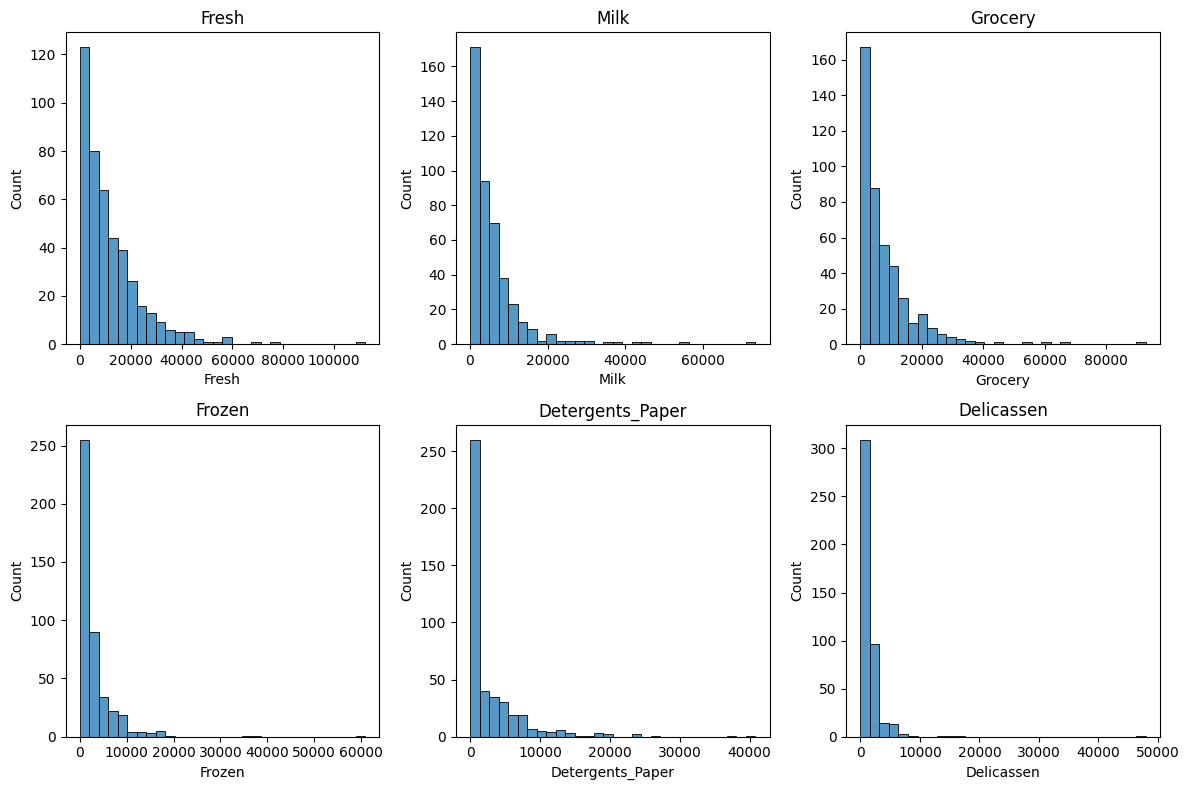

In [5]:
# Histogramas de las variables principales (gastos)
plt.figure(figsize=(12,8))
for i, col in enumerate(spend_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

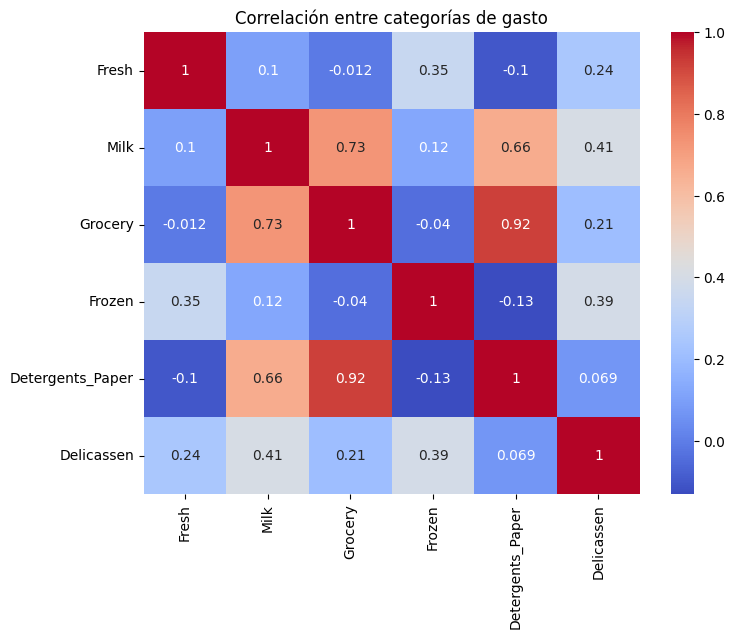

In [6]:
# Matriz de correlación y heatmap
corr = df[spend_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre categorías de gasto')
plt.show()

Varianza explicada PCA 2 componentes: 0.7246


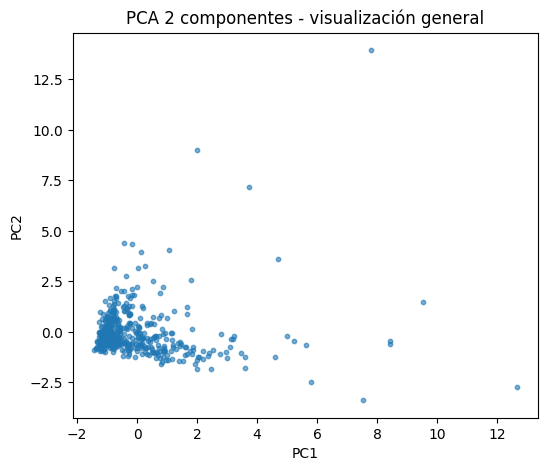

In [7]:
# PCA 2 componentes para visualización
scaler_vis = StandardScaler()
X_vis = scaler_vis.fit_transform(df[spend_cols])
pca_vis = PCA(n_components=2, random_state=42)
X_pca_vis = pca_vis.fit_transform(X_vis)
print('Varianza explicada PCA 2 componentes:', round(pca_vis.explained_variance_ratio_.sum(),4))
plt.figure(figsize=(6,5))
plt.scatter(X_pca_vis[:,0], X_pca_vis[:,1], s=10, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2 componentes - visualización general')
plt.show()

In [8]:
# Selección y escalado
X = df[spend_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(440, 6)

## 5. Modelización (KMeans, DBSCAN, HDBSCAN, OPTICS, Gaussian Mixtures)

Aplicaremos cada algoritmo y guardaremos etiquetas y métricas relevantes para comparar.

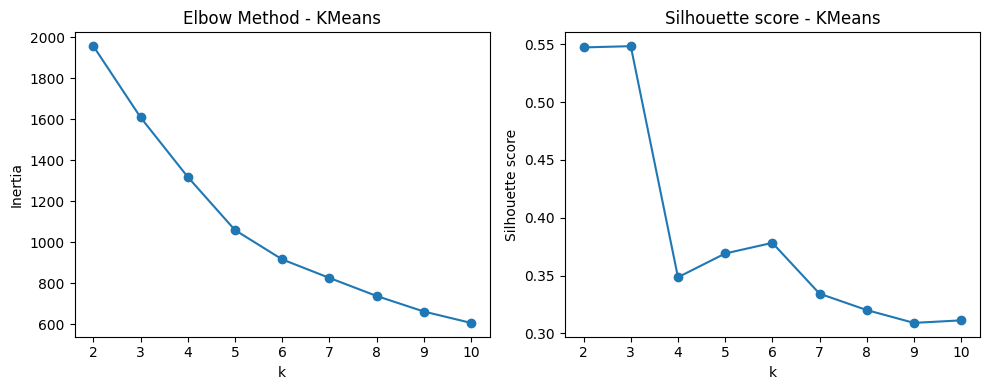

(3, 0.5482872649700601)

In [9]:
# KMeans: Elbow method e silhouette para k en 2..10
inertias = []
sil_scores = {}
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores[k] = silhouette_score(X_scaled, labels)

# Plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertias, '-o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method - KMeans')
plt.subplot(1,2,2)
plt.plot(list(K_range), [sil_scores[k] for k in K_range], '-o')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score - KMeans')
plt.tight_layout()
plt.show()

# Elegir k con mejor silhouette
best_k = max(sil_scores, key=sil_scores.get)
best_k, sil_scores[best_k]

In [10]:
# Ajuste final de KMeans con k seleccionado
k_final = best_k
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10).fit(X_scaled)
labels_kmeans = kmeans_final.labels_
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
print('KMeans clusters:', len(np.unique(labels_kmeans)), 'Silhouette:', round(sil_kmeans,4))

KMeans clusters: 3 Silhouette: 0.5483


In [11]:
# DBSCAN: probar combinaciones de eps y min_samples sobre datos escalados
db_results = []
eps_values = [0.3,0.5,0.7,0.9,1.1,1.5]
min_samps = [5,10]
for eps in eps_values:
    for ms in min_samps:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        sil = np.nan
        if n_clusters > 1:
            try:
                sil = silhouette_score(X_scaled, labels)
            except Exception:
                sil = np.nan
        db_results.append({'eps':eps,'min_samples':ms,'n_clusters':n_clusters,'silhouette':sil})

db_df = pd.DataFrame(db_results).sort_values(by=['n_clusters','silhouette'], ascending=False)
db_df.head(10)

,eps,min_samples,n_clusters,silhouette
2,0.5,5,2,0.195811
3,0.5,10,2,-0.014646
0,0.3,5,2,-0.129079
1,0.3,10,1,NaN
4,0.7,5,1,NaN
5,0.7,10,1,NaN
6,0.9,5,1,NaN
7,0.9,10,1,NaN
8,1.1,5,1,NaN
9,1.1,10,1,NaN


In [12]:
# Seleccionar una configuración razonable para DBSCAN (primera con n_clusters>0)
db_choice = db_df[db_df['n_clusters']>0].iloc[0]
db_choice_dict = db_choice.to_dict()
db_choice_dict

{'eps': 0.5,
 'min_samples': 5.0,
 'n_clusters': 2.0,
 'silhouette': 0.1958113956262888}

In [13]:
db = DBSCAN(eps=float(db_choice_dict['eps']), min_samples=int(db_choice_dict['min_samples'])).fit(X_scaled)
labels_db = db.labels_
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
sil_db = np.nan
if n_clusters_db > 1:
    sil_db = silhouette_score(X_scaled, labels_db)
print('DBSCAN clusters (sin contar ruido):', n_clusters_db, 'Silhouette:', sil_db)

DBSCAN clusters (sin contar ruido): 2 Silhouette: 0.1958113956262888


In [14]:
# HDBSCAN: ajustar min_cluster_size y obtener etiquetas (detecta ruido con etiqueta -1)
hdb = hdbscan.HDBSCAN(min_cluster_size=15)
labels_hdb = hdb.fit_predict(X_scaled)
n_clusters_hdb = len(set(labels_hdb)) - (1 if -1 in labels_hdb else 0)
sil_hdb = np.nan
if n_clusters_hdb > 1:
    try:
        sil_hdb = silhouette_score(X_scaled, labels_hdb)
    except Exception:
        sil_hdb = np.nan
print('HDBSCAN clusters (sin contar ruido):', n_clusters_hdb, 'Silhouette:', sil_hdb)

HDBSCAN clusters (sin contar ruido): 0 Silhouette: nan


C:\Users\op000427\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\op000427\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [15]:
# OPTICS: ajustar min_samples y xi; extraer etiquetas con clustering automático
opt = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
opt.fit(X_scaled)
labels_optics = opt.labels_
n_clusters_opt = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
sil_opt = np.nan
if n_clusters_opt > 1:
    try:
        sil_opt = silhouette_score(X_scaled, labels_optics)
    except Exception:
        sil_opt = np.nan
print('OPTICS clusters (sin contar ruido):', n_clusters_opt, 'Silhouette:', sil_opt)

OPTICS clusters (sin contar ruido): 1 Silhouette: nan


In [16]:
# Gaussian Mixture: probar componentes 2..10 y calcular silhouette
gmm_results = []
for k in range(2,11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    sil = np.nan
    try:
        sil = silhouette_score(X_scaled, labels)
    except Exception:
        sil = np.nan
    gmm_results.append({'n_components':k,'silhouette':sil})

gmm_df = pd.DataFrame(gmm_results)
gmm_df

,n_components,silhouette
0,2,0.449708
1,3,0.315904
2,4,0.163255
3,5,0.136571
4,6,0.099683
5,7,0.100154
6,8,0.111355
7,9,0.084916
8,10,0.064066


In [19]:
# Elegir mejor GMM por silhouette, con manejo de NaN (fallback por BIC si no hay silhouettes válidos)
valid = gmm_df.dropna(subset=['silhouette'])
if not valid.empty:
    best_gmm = valid.loc[valid['silhouette'].idxmax()]
else:
    # Si todos los silhouette son NaN (por ejemplo, modelos degenerados), evaluar por BIC
    bics = []
    for k in range(2,11):
        try:
            g = GaussianMixture(n_components=k, random_state=42).fit(X_scaled)
            bics.append({'n_components': k, 'bic': g.bic(X_scaled)})
        except Exception:
            bics.append({'n_components': k, 'bic': np.inf})
    bic_df = pd.DataFrame(bics)
    best_row = bic_df.loc[bic_df['bic'].idxmin()]
    best_gmm = pd.Series({'n_components': int(best_row['n_components']), 'silhouette': np.nan})

# Mostrar elección
display(best_gmm)

n_components    2.000000
silhouette      0.449708
Name: 0, dtype: float64

In [22]:
# Ajustar GMM final según la elección y obtener etiquetas (manejo de errores)
try:
    n_comp = int(best_gmm['n_components'])
except Exception:
    n_comp = 2
try:
    gmm_final = GaussianMixture(n_components=n_comp, random_state=42).fit(X_scaled)
    labels_gmm = gmm_final.predict(X_scaled)
    sil_gmm = np.nan
    if len(set(labels_gmm)) > 1:
        try:
            sil_gmm = silhouette_score(X_scaled, labels_gmm)
        except Exception:
            sil_gmm = np.nan
    print(f'GMM final: n_components={n_comp}, clusters={len(set(labels_gmm))}, silhouette={sil_gmm}')
except Exception as e:
    # Fallback: asignar todo a ruido (etiqueta -1) y registrar el error
    import traceback
    print('Error ajustando GMM final:', e)
    traceback.print_exc()
    labels_gmm = np.array([-1] * X_scaled.shape[0])
    sil_gmm = np.nan

GMM final: n_components=2, clusters=2, silhouette=0.449707803219945


In [23]:
# Preparar dataframe resumen
summary = []
# KMeans
summary.append({'Modelo':'KMeans','n_clusters':len(set(labels_kmeans)), 'silhouette': round(float(sil_kmeans),4)})
# DBSCAN
summary.append({'Modelo':'DBSCAN','n_clusters':n_clusters_db, 'silhouette': (round(float(sil_db),4) if not pd.isna(sil_db) else np.nan)})
# HDBSCAN
summary.append({'Modelo':'HDBSCAN','n_clusters':n_clusters_hdb, 'silhouette': (round(float(sil_hdb),4) if not pd.isna(sil_hdb) else np.nan)})
# OPTICS
summary.append({'Modelo':'OPTICS','n_clusters':n_clusters_opt, 'silhouette': (round(float(sil_opt),4) if not pd.isna(sil_opt) else np.nan)})
# GMM
summary.append({'Modelo':'GaussianMixture','n_clusters':len(set(labels_gmm)), 'silhouette': (round(float(sil_gmm),4) if not pd.isna(sil_gmm) else np.nan)})
summary_df = pd.DataFrame(summary).sort_values(by='silhouette', ascending=False)
display(summary_df)

,Modelo,n_clusters,silhouette
0,KMeans,3,0.5483
4,GaussianMixture,2,0.4497
1,DBSCAN,2,0.1958
2,HDBSCAN,0,NaN
3,OPTICS,1,NaN


## 6. Resultados y comparación de modelos

C:\Users\op000427\AppData\Local\Temp\ipykernel_6448\1431906250.py:18: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)
C:\Users\op000427\AppData\Local\Temp\ipykernel_6448\1431906250.py:18: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)
C:\Users\op000427\AppData\Local\Temp\ipykernel_6448\1431906250.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)


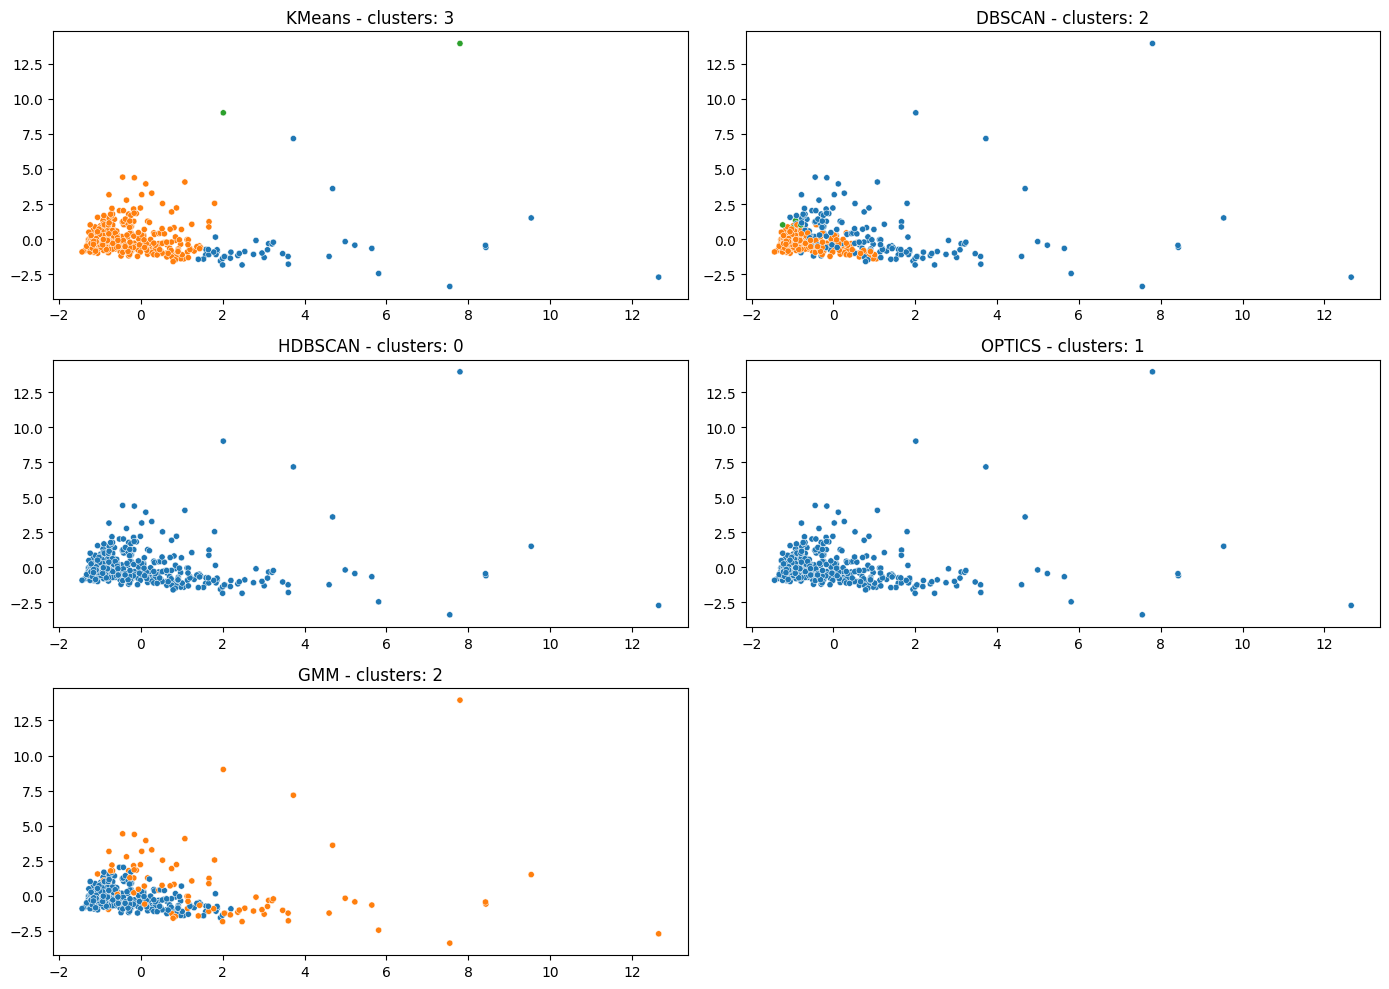

In [24]:
# Visualización 2D con PCA para cada modelo
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)
models_labels = {
    'KMeans': labels_kmeans,
    'DBSCAN': labels_db,
    'HDBSCAN': labels_hdb,
    'OPTICS': labels_optics,
    'GMM': labels_gmm,
}
plt.figure(figsize=(14,10))
i = 1
for name, labs in models_labels.items():
    plt.subplot(3,2,i)
    unique_labels = np.unique(labs)
    n_clusters = len(set(labs)) - (1 if -1 in labs else 0)
    palette = sns.color_palette('tab10', max(3, len(unique_labels)))
    sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)
    plt.title(f"{name} - clusters: {n_clusters}")
    i += 1
plt.tight_layout()
plt.show()

## 7. Conclusiones

- El preprocesamiento aplicado (selección de variables de gasto y escalado con StandardScaler) permitió que los algoritmos de clustering trabajaran sobre una representación más equilibrada de los clientes.

- De todos los modelos probados, KMeans con 3 clusters fue el que logró la mejor separación entre grupos, con un silhouette score cercano a 0.55, lo que indica una segmentación razonablemente clara.

- El modelo de Gaussian Mixture con 2 componentes también consiguió una segmentación aceptable, aunque con un silhouette menor, lo que sugiere clusters algo más solapados.

- DBSCAN consiguió identificar 2 clusters, pero con un silhouette mucho más bajo, por lo que su calidad de segmentación fue inferior a la de KMeans y GMM.

- Con los parámetros usados, HDBSCAN no detectó clusters consistentes (solo ruido) y OPTICS generó un único cluster, por lo que no aportaron segmentación útil en este caso.

- En conjunto, los resultados muestran que los clientes del distribuidor mayorista pueden agruparse en unos pocos segmentos diferenciados y que KMeans es el modelo que mejor captura esta estructura en los datos.

## 8. Recomendaciones

- Adoptar KMeans con 3 clusters como segmentación principal
Usar los 3 clusters de KMeans como base para clasificar a los clientes en tres segmentos. Después se puede calcular el gasto promedio por categoría en cada cluster para etiquetarlos como, por ejemplo: “alto gasto”, “medio” y “bajo” o según la categoría predominante.

- Diseñar estrategias diferenciadas por segmento

    - Segmento de mayor gasto total: enfocarse en retención y fidelización (descuentos por volumen, condiciones preferenciales, atención personalizada).

    - Segmentos de gasto medio/bajo: campañas de cross-selling y upselling para aumentar el ticket promedio y moverlos hacia un segmento más rentable.

- Revisar los clientes detectados como ruido o atípicos
Aunque HDBSCAN/OPTICS no formaron buenos clusters, los puntos marcados como ruido pueden revisarse manualmente: podrían ser clientes con comportamientos atípicos que requieren estrategias especiales (por riesgo o por oportunidad).

- Profundizar en el análisis de perfiles de cluster
Añadir en el notebook una tabla con las medias de cada variable por cluster (por ejemplo, X.assign(cluster=labels_kmeans).groupby('cluster').mean()) para describir mejor cada segmento y traducir esa información a acciones concretas de marketing y logística.

- Ajustar y experimentar con HDBSCAN/OPTICS a futuro
Probar otros valores de min_cluster_size, min_samples y xi podría revelar estructuras de densidad más interesantes. Estos modelos pueden ayudar a encontrar subgrupos más específicos o microsegmentos dentro de los clusters principales.